In [5]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Lab 2 - Intro to Stan

In [80]:
F = 6 # Gustaw
L = 6 # Cyburt

## Excercise 1

In [12]:
gen_quant = CmdStanModel(stan_file='code_1.stan')
samples = gen_quant.sample(data={'M':F},
                           fixed_param=True,
                           iter_sampling=1000,
                           iter_warmup=0,
                           chains = 1)

16:10:17 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


16:10:18 - cmdstanpy - INFO - CmdStan done processing.


Pandas Dataframe:

In [34]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,230.5400,260.0,240.0,212.0,231.0,218.0,252.0
1,0.0,0.0,59.7245,55.0,51.0,51.0,54.0,56.0,45.0
2,0.0,0.0,126.0760,112.0,137.0,130.0,126.0,129.0,134.0
3,0.0,0.0,91.4460,115.0,99.0,83.0,85.0,97.0,100.0
4,0.0,0.0,112.0950,106.0,106.0,139.0,97.0,112.0,105.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,61.0474,74.0,52.0,67.0,52.0,58.0,62.0
996,0.0,0.0,33.7977,35.0,42.0,31.0,35.0,37.0,30.0
997,0.0,0.0,20.3671,22.0,28.0,21.0,21.0,23.0,10.0
998,0.0,0.0,122.4430,119.0,110.0,122.0,129.0,124.0,110.0


y_sim's and lambda histograms:

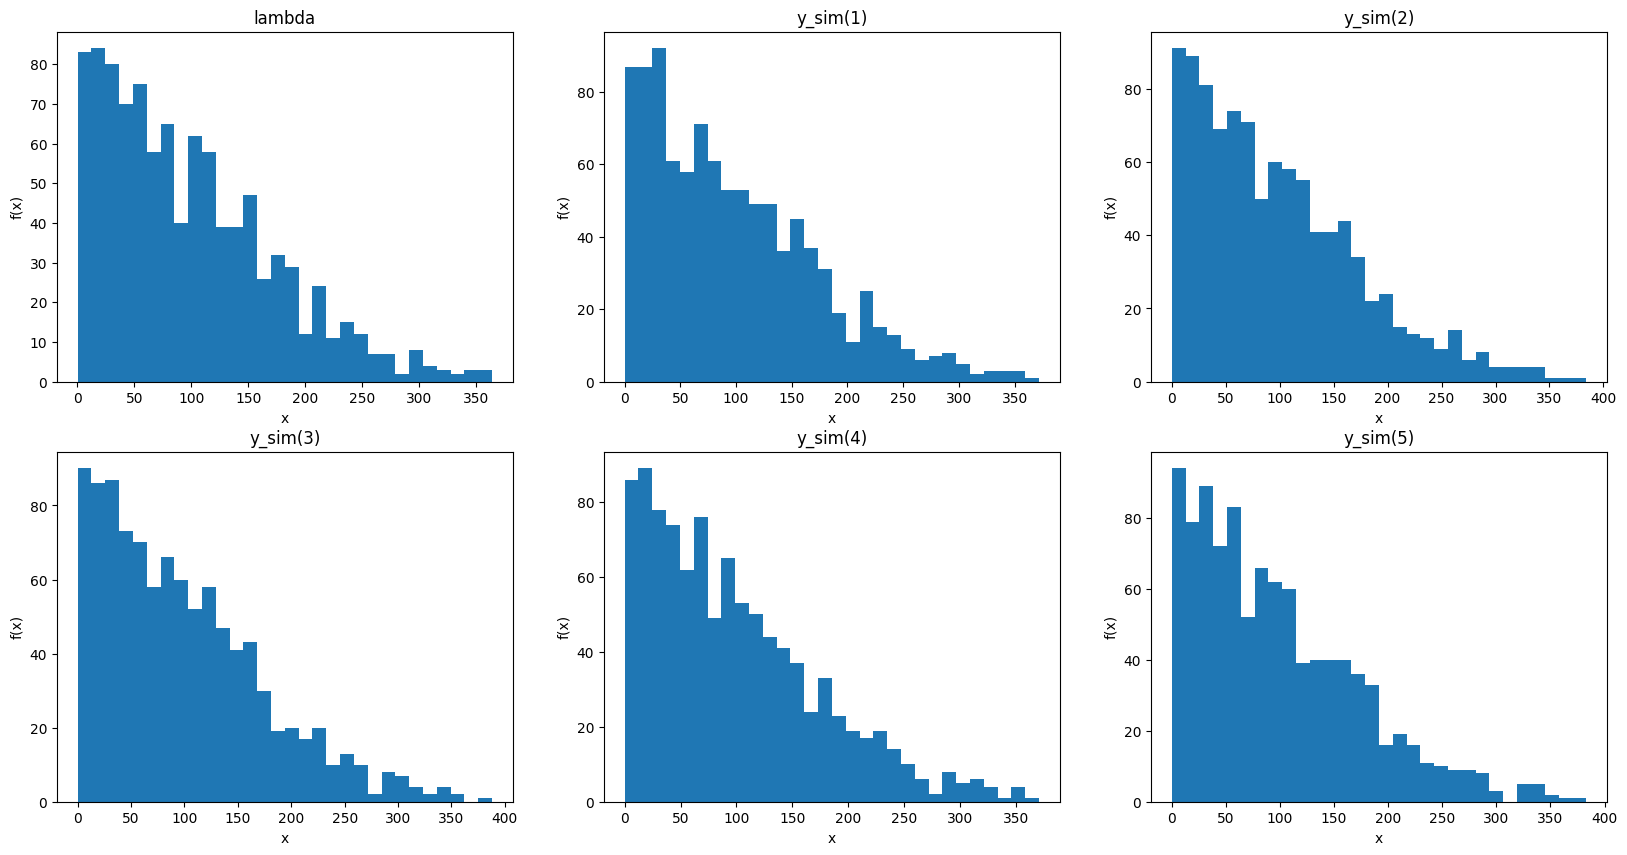

In [49]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()
bins = 30

df["lambda"].plot.hist(bins=bins, ax=ax[0])

ax[0].set_title("lambda")
ax[0].set_xlabel("x"), ax[0].set_ylabel("f(x)")

for i in range(1, 6):
   df[f"y_sim[{i}]"].plot.hist(bins=bins, ax=ax[i])
   ax[i].set_title(f"y_sim({i})")
   ax[i].set_xlabel("x"), ax[i].set_ylabel("f(x)")

plt.show()

## Excercise 2

In [21]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

16:49:45 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


16:49:45 - cmdstanpy - INFO - CmdStan done processing.


16:49:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


16:49:46 - cmdstanpy - INFO - CmdStan done processing.


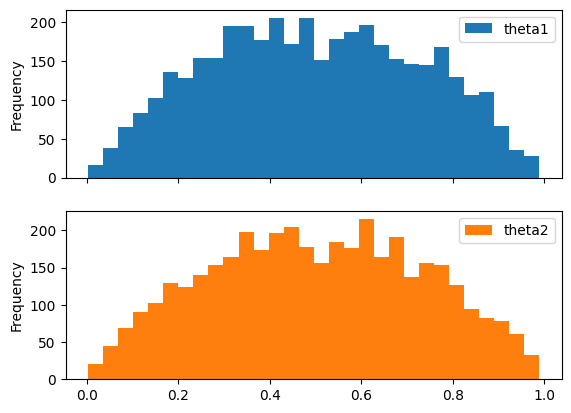

In [55]:
t1 = samp_bern1.stan_variable('theta')
t2 = samp_bern2.stan_variable('theta')

df = pd.DataFrame({'theta1': t1, 'theta2': t2})
df.plot.hist(subplots=True, bins=30)
plt.show()

I don't see significant change.

## Excercise 3

Unconstrained parameters

17:33:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▍        | 00:00 Iteration:  800 / 7000 [ 11%]  (Warmup)



chain 1 |██▊       | 00:00 Iteration: 1700 / 7000 [ 24%]  (Sampling)


chain 1 |████      | 00:00 Iteration: 2600 / 7000 [ 37%]  (Sampling)




chain 1 |█████▎    | 00:00 Iteration: 3500 / 7000 [ 50%]  (Sampling)


chain 1 |██████▍   | 00:00 Iteration: 4300 / 7000 [ 61%]  (Sampling)


chain 1 |███████▌  | 00:00 Iteration: 5100 / 7000 [ 72%]  (Sampling)


chain 1 |████████▍ | 00:00 Iteration: 5800 / 7000 [ 82%]  (Sampling)


chain 1 |█████████▍| 00:00 Iteration: 6500 / 7000 [ 92%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


17:33:10 - cmdstanpy - INFO - CmdStan done processing.
17:33:10 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is -0.946461, but must be positive finite! (in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_4.stan', line 6, column 3 to column 29)
	Exception: gamma_lpdf: Random variable is -0.864845, but must be positive finite! (in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_4.stan', line 6, column 3 to column 29)
	Exception: gamma_lpdf: Random variable is -0.10047, but must be positive finite! (in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_4.stan', line 6, column 3 to column 29)
	Exception: gamma_lpdf: Random variable is -14.5942, but must be positive finite! (in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_4.stan', line 6, column 3 to column 29)
	Exception: gamma_lpdf: Random variable is -4.11902, but must be positive finite! (in 'C:/Users/g

17:33:10 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 2473 divergent transitions (41.2%)
	Chain 2 had 2549 divergent transitions (42.5%)
	Chain 3 had 1829 divergent transitions (30.5%)
	Chain 4 had 1991 divergent transitions (33.2%)
	Use function "diagnose()" to see further information.


CmdStanMCMC: model=code_4 chains=4['method=sample', 'num_samples=6000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713173309_1.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713173309_2.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713173309_3.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713173309_4.csv
 output_files:
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713173309_0-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713173309_1-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713173309_2-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_4-20230713173309_3-stdout.txt


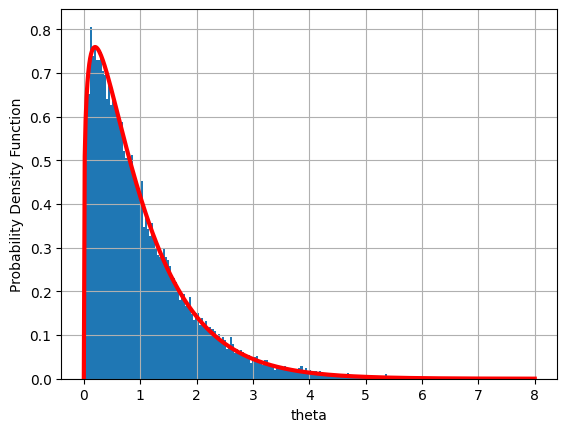

In [75]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples', iter_sampling=6000, iter_warmup=1000, seed=24072000)
out_gamma1.diagnose()
print(out_gamma1)

N=500

xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale=1 / 1.25)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.plot(xs, pdfs, linewidth=3, color='r')

df = out_gamma1.draws_pd()
df["theta"].hist(bins=200, density=True)

plt.show()


There are warnings that theta is negative (< 0).

Constrained parameter

17:46:30 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration: 1400 / 7000 [ 20%]  (Sampling)




chain 1 |████▋     | 00:00 Iteration: 3100 / 7000 [ 44%]  (Sampling)


chain 1 |███████▏  | 00:00 Iteration: 4900 / 7000 [ 70%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 6600 / 7000 [ 94%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


17:46:31 - cmdstanpy - INFO - CmdStan done processing.
17:46:31 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'C:/Users/gcyburt/Documents/repos/priv/AGH-Data-Analytics/lab_2/code_5.stan', line 6, column 3 to column 29)
Consider re-running with show_console=True if the above output is unclear!



CmdStanMCMC: model=code_5 chains=4['method=sample', 'num_samples=6000', 'num_warmup=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713174630_1.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713174630_2.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713174630_3.csv
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713174630_4.csv
 output_files:
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713174630_0-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713174630_1-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713174630_2-stdout.txt
	C:\Users\gcyburt\Documents\repos\priv\AGH-Data-Analytics\lab_2\samples\code_5-20230713174630_3-stdout.txt


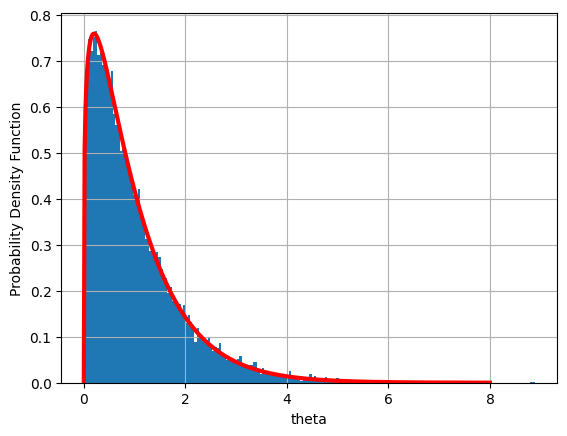

In [78]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=24072000)
out_gamma2.diagnose()
print(out_gamma2)

N=500

xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale=1 / 1.25)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.plot(xs, pdfs, linewidth=3, color='r')

df = out_gamma2.draws_pd()
df["theta"].hist(bins=200, density=True)

plt.show()

Log is free from warnings that ocurred above.

## Excercise 4

In [84]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 0.75

data={'y_guess':[y0], 'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

17:51:50 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


17:51:50 - cmdstanpy - INFO - CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.32935


Standard deviation is around 2.33.

## Excercise 5

17:53:04 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


17:53:04 - cmdstanpy - INFO - CmdStan done processing.
17:53:04 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


17:53:05 - cmdstanpy - INFO - CmdStan done processing.
17:53:05 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                     


17:53:05 - cmdstanpy - INFO - CmdStan done processing.


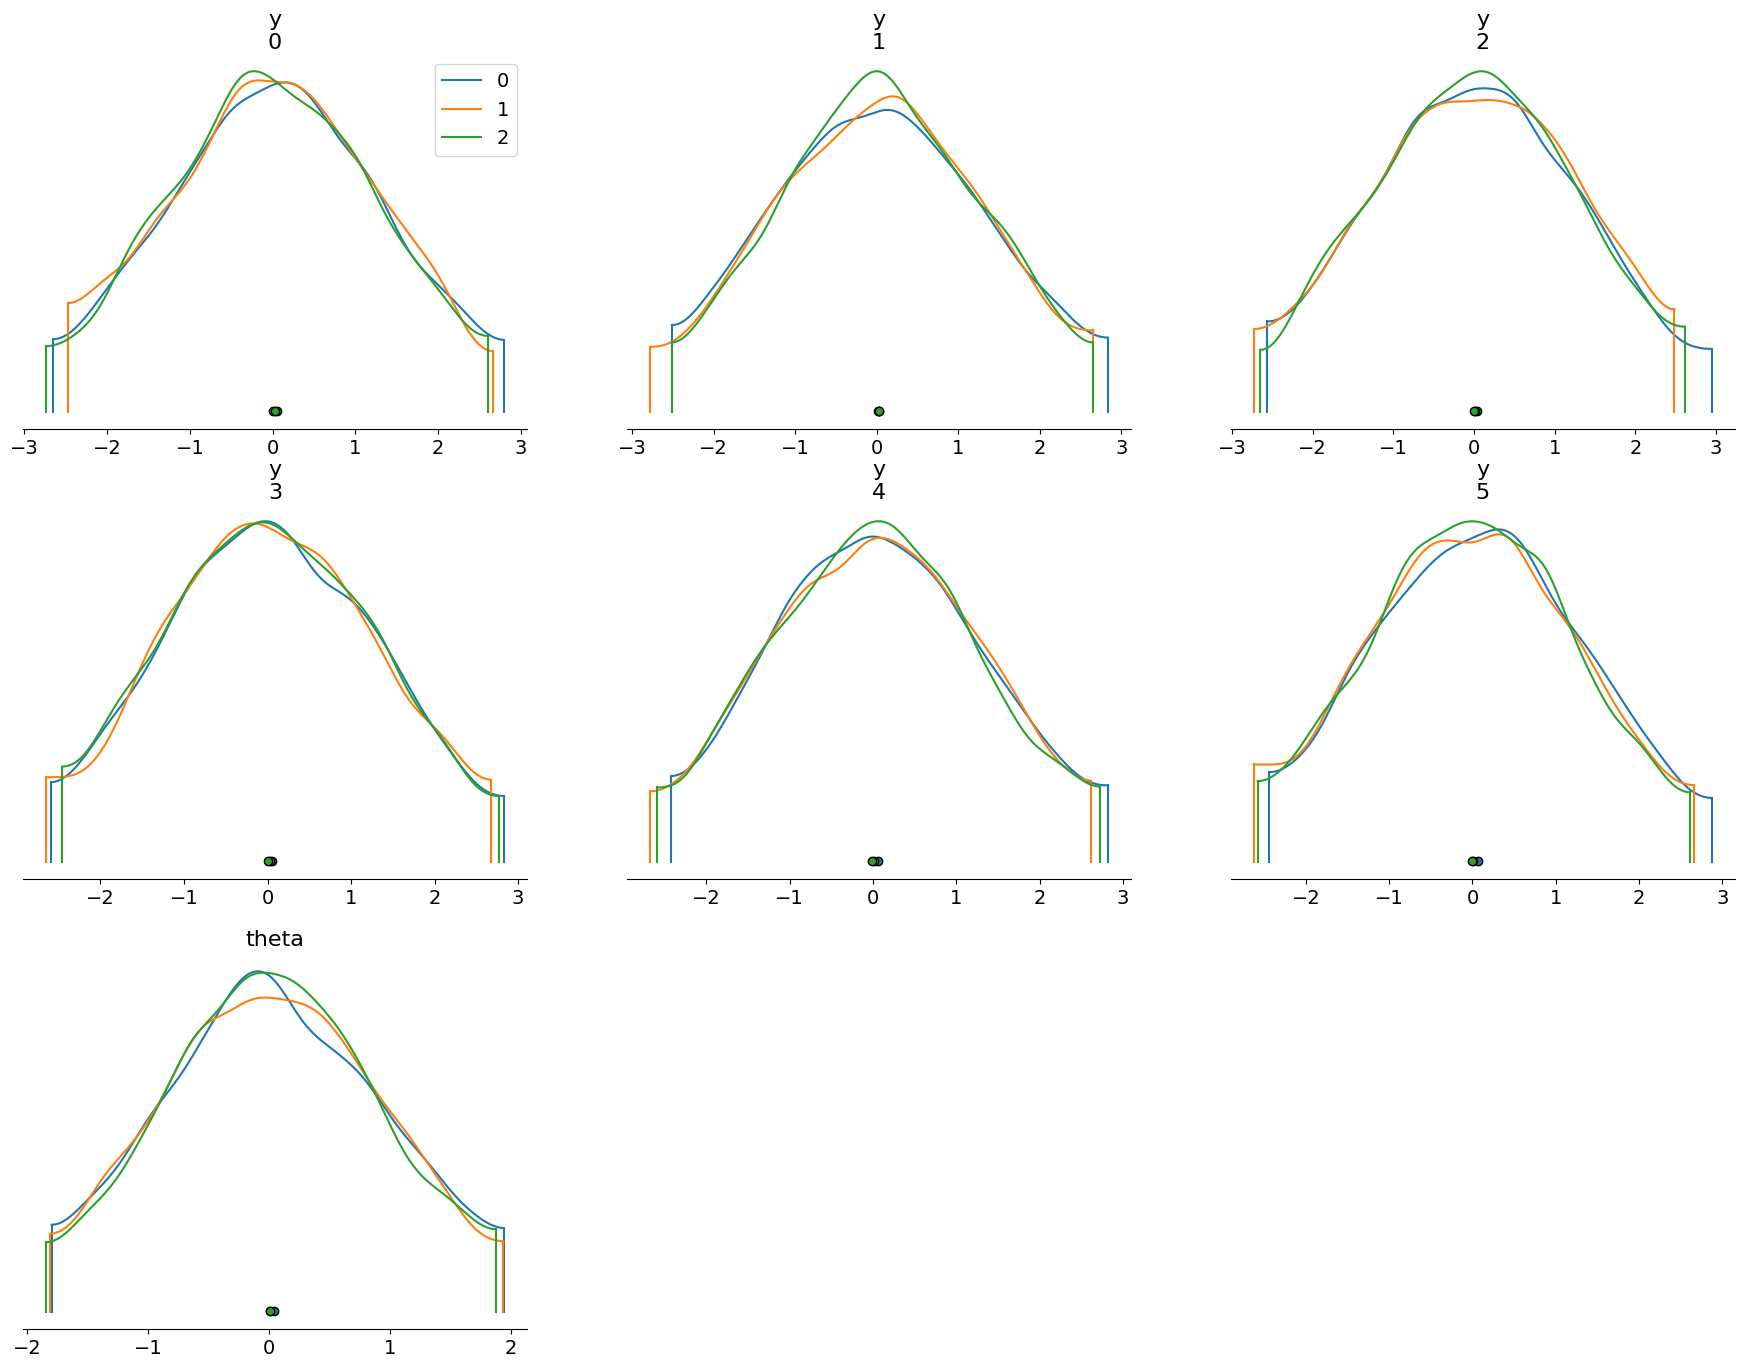

In [85]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 24072000
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6

17:54:59 - cmdstanpy - WARNING - Argument name `mcmc_sample` is deprecated, please rename to `previous_fit`.
17:54:59 - cmdstanpy - INFO - Chain [1] start processing
17:54:59 - cmdstanpy - INFO - Chain [2] start processing
17:54:59 - cmdstanpy - INFO - Chain [3] start processing
17:54:59 - cmdstanpy - INFO - Chain [4] start processing
17:54:59 - cmdstanpy - INFO - Chain [1] done processing
17:54:59 - cmdstanpy - INFO - Chain [3] done processing
17:54:59 - cmdstanpy - INFO - Chain [2] done processing
17:54:59 - cmdstanpy - INFO - Chain [4] done processing
17:54:59 - cmdstanpy - WARNING - Sample doesn't contain draws from warmup iterations, rerun sampler with "save_warmup=True".


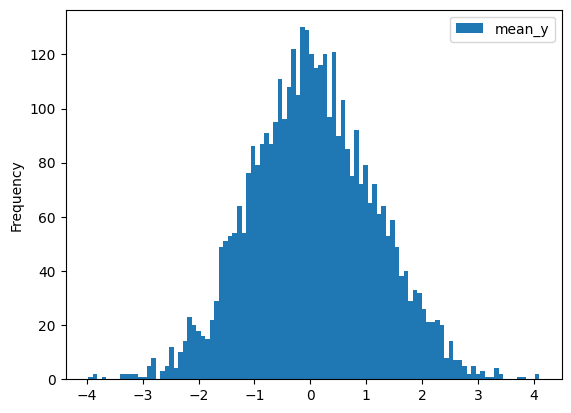

In [86]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample = result_1)
# investigate the output and plot histogram of mean_y variable
hist_df=mean_of_y.draws_pd()
hist_df.plot.hist(bins=100)
plt.show()